In [73]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
FILENAME = "2021-03-11-22-53-47-563167" # Bending wave
calcium_bend = pd.read_hdf("../results/data/calcium/" + FILENAME + ".h5")
calcium_bend = calcium_bend.values.reshape(len(calcium_bend), 30, 60)
calcium_bend = calcium_bend[:, :30, :]

In [75]:
calcium_bend.shape

(50, 30, 60)

In [76]:
FILENAME = "2021-03-11-22-49-32-444128" # Fast wave
calcium_fast = pd.read_hdf("../results/data/calcium/" + FILENAME + ".h5")
calcium_fast = calcium_fast.values.reshape(len(calcium_fast), 30, 60)
# calcium_fast = calcium_fast[:, :30, :]

In [77]:
calcium_fast.shape

(100, 30, 60)

In [78]:
FILENAME = "2021-03-11-23-29-33-337792" # Body column wave
calcium_body = pd.read_hdf("../results/data/calcium/" + FILENAME + ".h5")
calcium_body = calcium_body.values.reshape(len(calcium_body), 30, 60)
calcium_body = calcium_body[:, :30, :]

In [79]:
calcium_body.shape

(50, 30, 60)

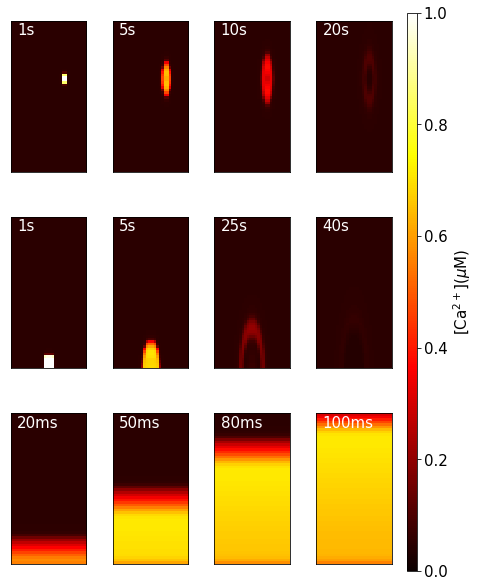

In [81]:
fig = plt.figure(figsize=(7,10))

# Add axes
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])
gs.update(hspace=0.3)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[0])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[1], hspace=0.3)
gs2 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[2], hspace=0.3)

axs0 = []
axs1 = []
axs2 = []

axs_all = [axs0, axs1, axs2]
gs_all = [gs0, gs1, gs2]
times_fast = [0.02, 0.05, 0.08, 0.1]
times_bend = [1, 5, 25, 40]
times_body = [1, 5, 10, 20]
chars = ['A', 'B', 'C']

for j in range(4):
    for k in range(0, 3):
        ax = plt.subplot(gs_all[k][0, j])
        axs_all[k].append(ax)
        if k == 0:
            data = calcium_body
            times = times_body
            dt = 1
        elif k == 1:
            data = calcium_bend
            times = times_bend
            dt = 1
        else:
            data = calcium_fast
            times = times_fast
            dt = 0.01
            
        # Plot the frame
        im = ax.imshow(np.flip(data[int(times[j]/dt)].T, 0), cmap='hot', vmin=0, vmax=1)
        if k == 2:
            ax.text(2, 5, str(int((times[j])*1000)) + 'ms', color='white', fontsize=15)
        elif k == 0:
            ax.text(2, 5, str(int(times[j])) + 's', color='white', fontsize=15)
        else:
            ax.text(2, 5, str(int(times[j])) + 's', color='white', fontsize=15)
            
#         if j == 0:
#             ax.text(-0.3, 1.07, chars[k], size=30, weight="bold", transform=ax.transAxes)
        
        ax.set_xticks([])
        ax.set_yticks([])
#         ax.patch.set_edgecolor('g')  
        ax.patch.set_alpha(1)
#         ax.patch.set_linewidth('15')
        
#         ax.set_xticks([])
#         ax.set_yticks([])

position = fig.add_axes([0.92, 0.116, 0.02, 0.775])
cb = plt.colorbar(im, cax=position, orientation='vertical')
cb.set_label('[Ca$^{2+}$]($\mu$M)', fontsize=15)
cb.ax.tick_params(labelsize=15)
# cb.set_label('[Ca$^{2+}$](uM)')

plt.savefig('../results/figures/waves.png', bbox='tight_layout')
plt.show()